In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Solar_Footprints_V2_7811899327930675815.csv')
df.head()

,OBJECTID,County,Acres,Install Type,Urban or Rural,Combined Class,Distance to Substation (Miles) GTET 100 Max Voltage,Percentile (GTET 100 Max Voltage),Substation Name GTET 100 Max Voltage,HIFLD ID (GTET 100 Max Voltage),...,Percentile (GTET 200 Max Voltage),Substation Name GTET 200 Max Voltage,HIFLD ID (GTET 200 Max Voltage),Distance to Substation (Miles) CAISO,Percentile (CAISO),Substation CASIO Name,HIFLD ID (CAISO),Solar Technoeconomic Intersection,Shape__Area,Shape__Length
0,1,Alameda County,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.272283,0 to 25th,Los Esteros,310258.0,Within,6768.954679,365.801336
1,2,Alameda County,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.392816,0 to 25th,Los Esteros,310258.0,Within,7677.228982,366.909878
2,3,Alameda County,1.275783,Rooftop,Urban,Rooftop - Urban,0.426104,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.537298,0 to 25th,Los Esteros,310258.0,Within,5162.935990,290.576263
3,4,Alameda County,1.424286,Rooftop,Urban,Rooftop - Urban,0.491306,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.626699,0 to 25th,Los Esteros,310258.0,Within,5763.905754,344.705846
4,5,Alameda County,0.984429,Rooftop,Urban,Rooftop - Urban,0.795822,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.728629,25th to 50th,Los Esteros,310258.0,Within,3983.859693,283.968425


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   OBJECTID                                             5397 non-null   int64  
 1   County                                               5397 non-null   object 
 2   Acres                                                5397 non-null   float64
 3   Install Type                                         5397 non-null   object 
 4   Urban or Rural                                       5397 non-null   object 
 5   Combined Class                                       5397 non-null   object 
 6   Distance to Substation (Miles) GTET 100 Max Voltage  5397 non-null   float64
 7   Percentile (GTET 100 Max Voltage)                    5397 non-null   object 
 8   Substation Name GTET 100 Max Voltage                 5397 non-null  

In [120]:
len(df.County.unique())

51

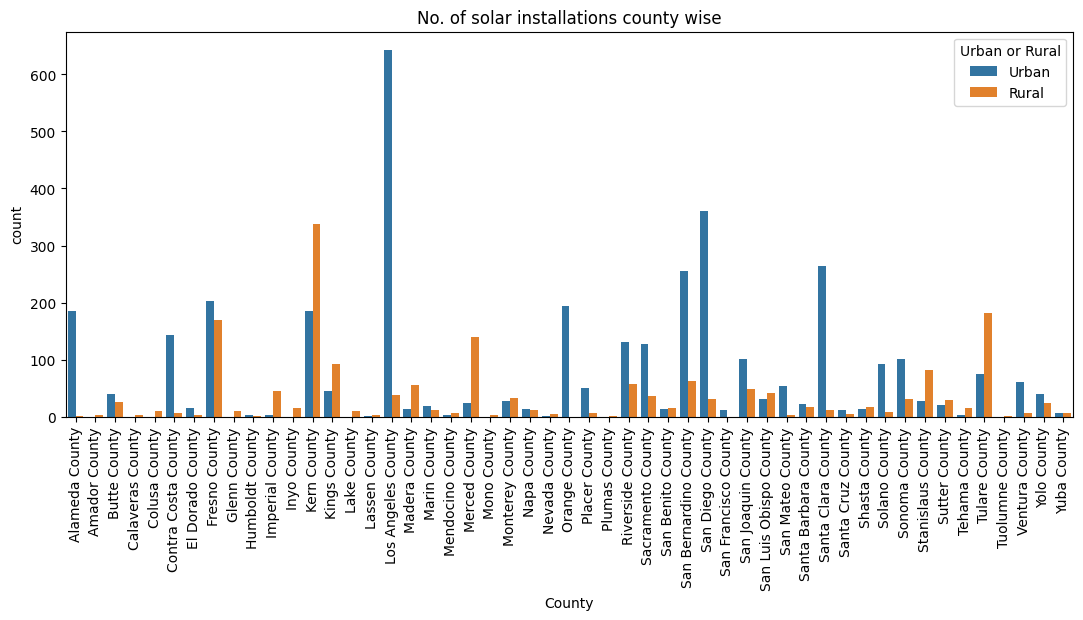

In [4]:
plt.figure(figsize=(13,5))
sns.countplot(x=df.County, hue='Urban or Rural',data=df)
plt.title('No. of solar installations county wise')
plt.xticks(rotation=90);

In [5]:
len(df["HIFLD ID (GTET 100 Max Voltage)"].unique())

623

In [6]:
df['Combined Class'].unique()

array(['Rooftop - Urban', 'Parking - Urban', 'Ground - Urban',
       'Ground - Rural', 'Rooftop - Rural', 'Parking - Rural'],
      dtype=object)

In [28]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapi")
california_counties=df.County.unique()
latitude = []
longitude = []

for county in california_counties:
    location = geolocator.geocode(f"{county}, California")
    latitude.append(location.latitude)
    longitude.append(location.longitude)
df1=pd.DataFrame({'County':df.County.unique(),'latitude':latitude,'longitude':longitude})
df2=pd.merge(df,df1,on='County',how='outer')


In [67]:
df3=df[['County' ,'Urban or Rural']].value_counts().reset_index()
df3.columns=['County' ,'Urban or Rural','frequency']
df3=pd.merge(df3,df1,on='County',how='outer')
df31=df3[df3['Urban or Rural']!='Urban']
df32=df3[df3['Urban or Rural']!='Rural']
df31.head()

,County,Urban or Rural,frequency,latitude,longitude
1,Alameda County,Rural,1,37.609029,-121.899142
2,Amador County,Rural,2,38.449089,-120.591102
4,Butte County,Rural,25,39.651927,-121.585844
5,Calaveras County,Rural,2,38.255818,-120.498149
6,Colusa County,Rural,10,39.146558,-122.220956


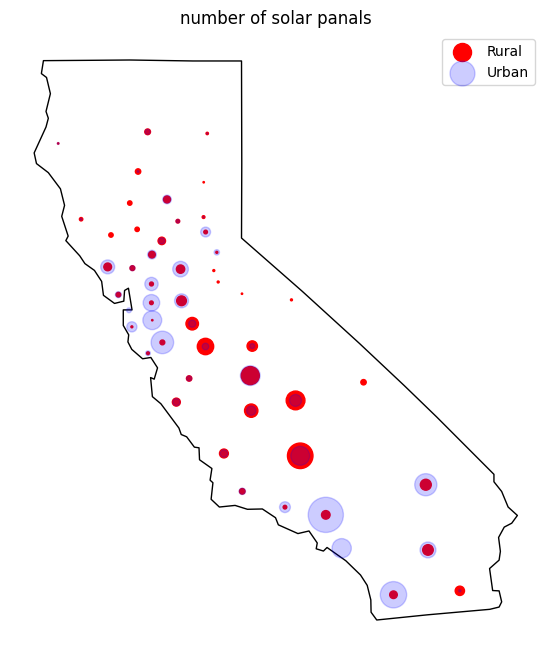

In [77]:
import geopandas as gpd
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
states = gpd.read_file(url)
california = states[states['name'] == 'California']
california.plot(edgecolor='black', facecolor='none', figsize=(8, 8))
plt.title("number of solar panals")
plt.scatter(df31.longitude,df31.latitude,s=df31.frequency,c='r',label='Rural')
plt.scatter(df32.longitude,df32.latitude,s=df32.frequency,c='b',label='Urban',alpha=0.2)
plt.axis('off')
plt.legend();

In [79]:
df4=df.groupby('County')['Acres'].sum()
df5=pd.merge(df4,df1,on='County',how='outer')
df5.head()

,County,Acres,latitude,longitude
0,Alameda County,407.018556,37.609029,-121.899142
1,Amador County,9.747331,38.449089,-120.591102
2,Butte County,128.993951,39.651927,-121.585844
3,Calaveras County,1.741138,38.255818,-120.498149
4,Colusa County,25.710354,39.146558,-122.220956


In [109]:
dp=pd.read_csv('Population-Density By County.csv')
dp=dp[(dp['GEO.display-label']=='California')]
dp=dp[['GCT_STUB.display-label','Density per square mile of land area']]
dp.rename(columns={'GCT_STUB.display-label':'County','Density per square mile of land area':'pop_density'},inplace=True)
dp1=pd.merge(df5,dp,on='County',how='outer')
dp1=dp1.dropna()


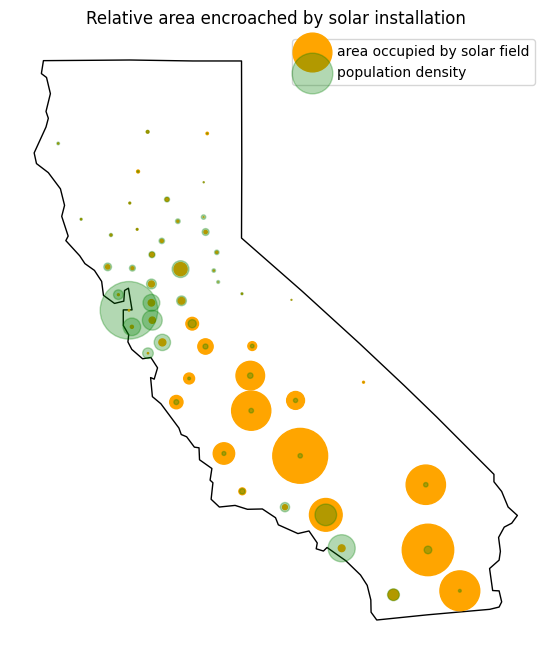

In [113]:
california.plot(edgecolor='black', facecolor='none', figsize=(8, 8))
plt.title("Relative area encroached by solar installation")
plt.scatter(dp1.longitude,dp1.latitude,s=dp1.Acres/20,c='orange',label='area occupied by solar field')
plt.scatter(dp1.longitude,dp1.latitude,s=dp1.pop_density/10,c='green',label='population density',alpha=0.3)
plt.legend()
plt.axis('off');
